In [1]:
import math
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# find line theta
img = Image.open("images/left-up.jpg").convert("L")
arr = np.array(img)
h, w = arr.shape

In [3]:
def display(arr, axis=False) :
    plt.imshow(arr, cmap="gray")
    plt.axis(axis)

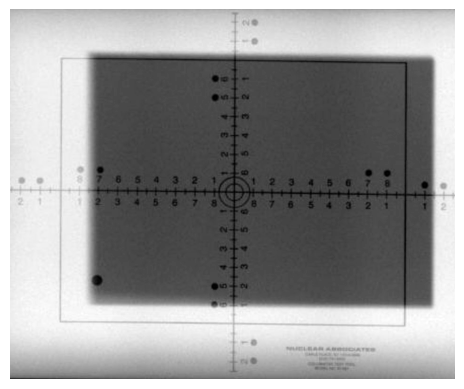

In [4]:
display(arr)

In [5]:
def find_center_line(arr, visualize=True) :
    """
    find center line
    Return: (x1, y1), (x2, y2)
    """
    h, w = arr.shape
    hp = int(0.12*h)
    wp = int(0.05*w)
    focus = arr[hp: h-hp, wp: wp*2]
    ys = np.argmin(focus, axis=0)
    unique_elements, counts = np.unique(ys, return_counts=True)
    most_common_index = np.argmax(counts)
    y1 = unique_elements[most_common_index] + hp # because focus start at hp not 0

    focus = arr[hp: h-hp, w-(wp*2): w-wp]
    ys = np.argmin(focus, axis=0)
    unique_elements, counts = np.unique(ys, return_counts=True)
    most_common_index = np.argmax(counts)
    y2 = unique_elements[most_common_index] + hp 

    if visualize :
        plt.figure(figsize=(3, 6))
        plt.subplot(1, 2, 1)
        display(arr[hp:h-hp, wp: wp*2], axis=True)
        plt.tick_params(bottom=False, labelbottom=False) # hide x-axis

        plt.subplot(1, 2, 2)
        display(arr[hp:h-hp, w-(wp*2): w-wp], axis=True)
        plt.tick_params(bottom=False, labelbottom=False)
        plt.suptitle(f"Center line is on \n{y1-hp} and {y2-hp} [y-axis]")

    return (0, y1), (w, y2)

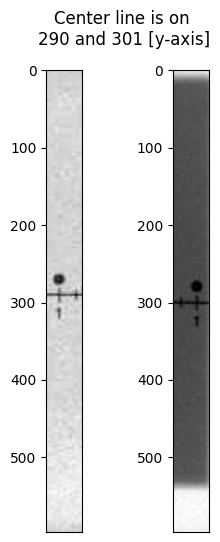

In [6]:
(x1, y1), (x2, y2) = find_center_line(arr)

In [7]:
def draw_line(arr, x1, y1, x2, y2) :
    plt.imshow(arr, cmap="gray")
    plt.plot([x1, x2], [y1, y2], color='blue', linewidth=1)
    plt.axis(False)

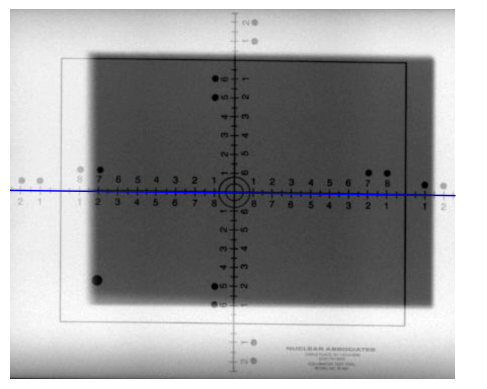

In [8]:
draw_line(arr, x1, y1, x2, y2)

In [9]:
def find_theta(w, y1, y2) :
    """
    find theta from y1, y2
    Return: theta in degree
    """
    a = y2-y1
    theta_r = math.asin(a/w)
    theta_d = math.degrees(theta_r)
    return theta_d

In [10]:
theta_d = find_theta(w, y1, y2)
theta_d

0.6690742027311448

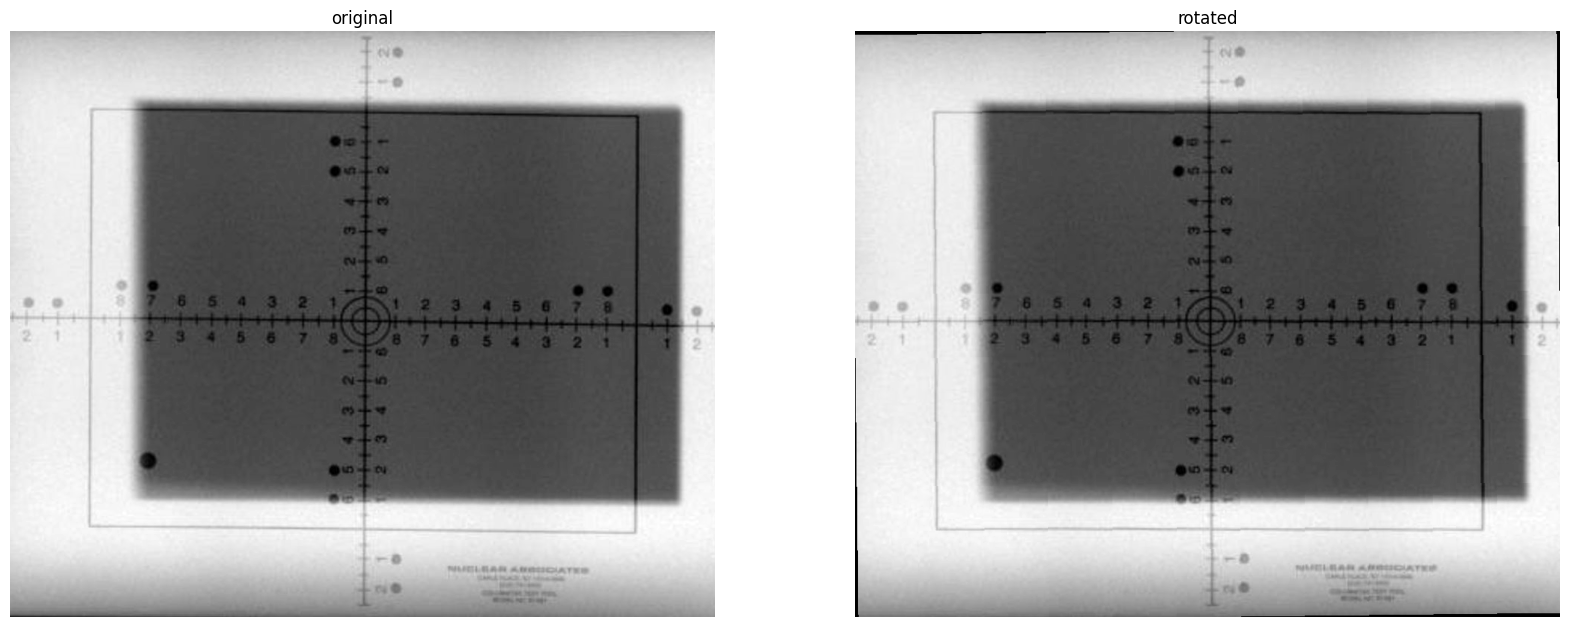

In [11]:
rotate_img= img.rotate(theta_d)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("original")
display(img)

plt.subplot(1, 2, 2)
plt.title("rotated")
display(rotate_img)